In [1]:
# https://www.tensorflow.org/tutorials/keras/classification

# TensorFlow y tf.keras.
import tensorflow as tf
from tensorflow import keras

# Help libraries.
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [2]:
import tensorflow

In [3]:
# Import Mnist Dataset.
"""
Train images/label for learning.
Test images/label for testing.

Images are 28x28 numpy array, with pixel values from 0 to 255. 
Labels are 0-9 integer array.
"""
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

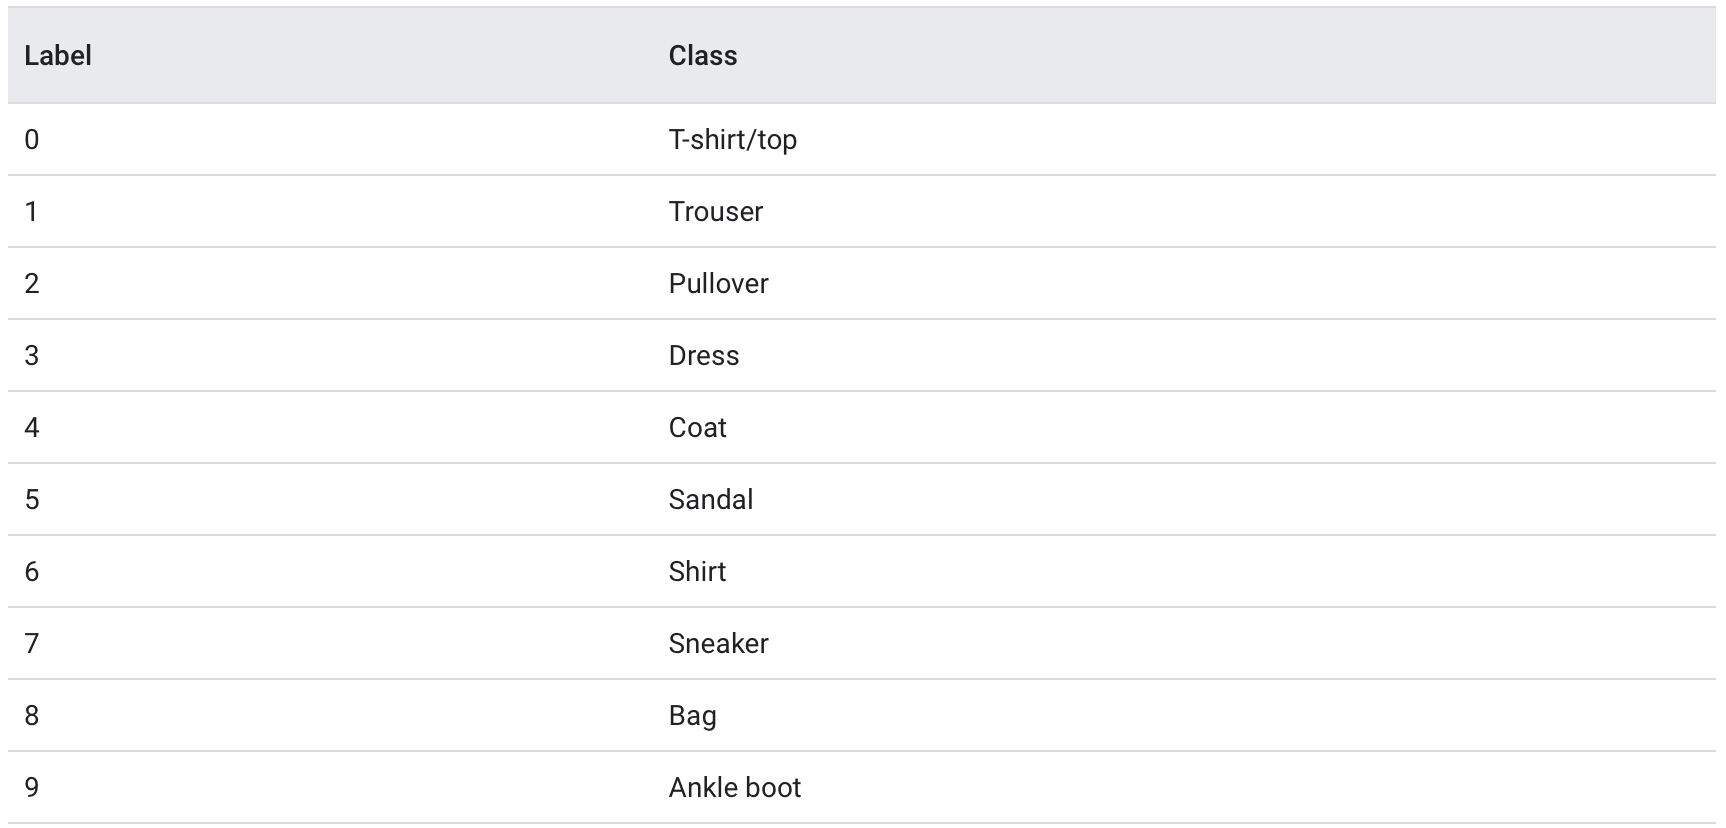

In [4]:
# Display image.
from IPython.display import Image
Image('class_label.png')

In [5]:
# Labels.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
# Dataset metrics for training.
print("Shape: ", train_images.shape)
print("Len: ", len(train_images))
print("Labels: ", train_labels) # From 0 to 9.

Shape:  (60000, 28, 28)
Len:  60000
Labels:  [9 0 0 ... 3 0 5]


In [7]:
# Dataset metrics for testing.
print("Shape: ", test_images.shape)
print("Len: ", len(test_images))
print("Labels: ", test_labels)

Shape:  (10000, 28, 28)
Len:  10000
Labels:  [9 2 1 ... 8 1 5]


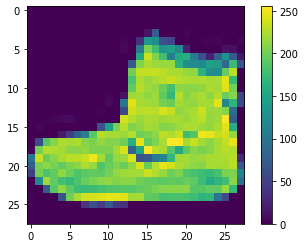

In [8]:
# The data must be preprocessed before training the network.
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
# Scale these values to a range of 0 to 1 before feeding them to the neural network model.
train_images = train_images / 255.0
test_images = test_images / 255.0

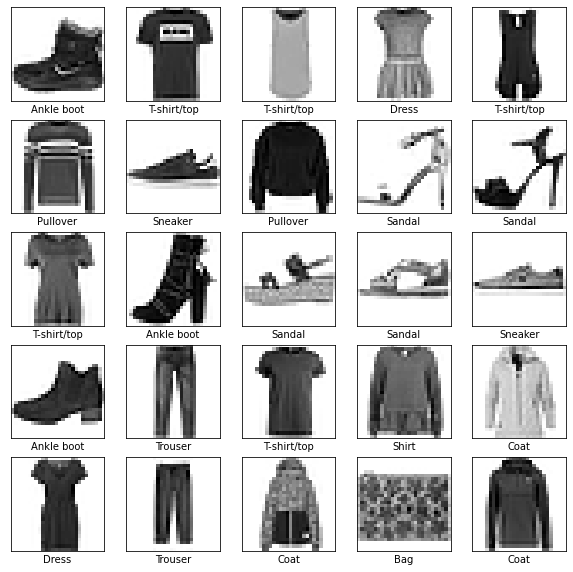

In [10]:
# 25 Images/labels.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

In [11]:
# Set up the layers and build the model.
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

2021-08-12 00:57:48.145822: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- Optimizer —This is how the model is updated based on the data it sees and its loss function.
- Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [12]:
# Compile the model.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training the neural network model requires the following steps:
- Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
- The model learns to associate images and labels.
- You ask the model to make predictions about a test set—in this example, the test_images array.
- Verify that the predictions match the labels from the test_labels array.

In [13]:
# Train the model.
model.fit(train_images, train_labels, epochs=10)

2021-08-12 00:57:48.708495: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5026 - accuracy: 0.8234
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3784 - accuracy: 0.8632
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3390 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3168 - accuracy: 0.8838
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2973 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2826 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2697 - accuracy: 0.8994
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2602 - accuracy: 0.9027
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2497 - accuracy: 0.9056
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.241

In [14]:
# Evaluate accuracy.
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3279 - accuracy: 0.8859

Test accuracy: 0.8859000205993652


In [15]:
# Make predictions.
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

array([2.80700533e-06, 1.17227064e-04, 1.20790542e-08, 1.51913593e-08,
       2.40011627e-06, 7.56384514e-04, 4.61765701e-08, 1.03246039e-02,
       1.56009828e-05, 9.88780975e-01], dtype=float32)

In [16]:
# A prediction is an array of 10 numbers. They represent the model's "confidence" that the image 
# corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:
np.argmax(predictions[0])

9

In [17]:
# Real test_label for that image.
test_labels[0]

9

# Graph this to look at the full set of 10 class predictions.

In [18]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

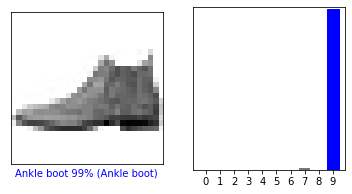

In [19]:
# Graphic of last prediction.
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

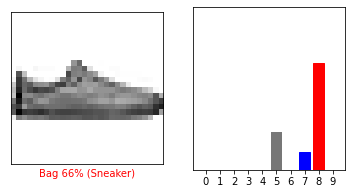

In [20]:
# Graphic of another prediction.
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

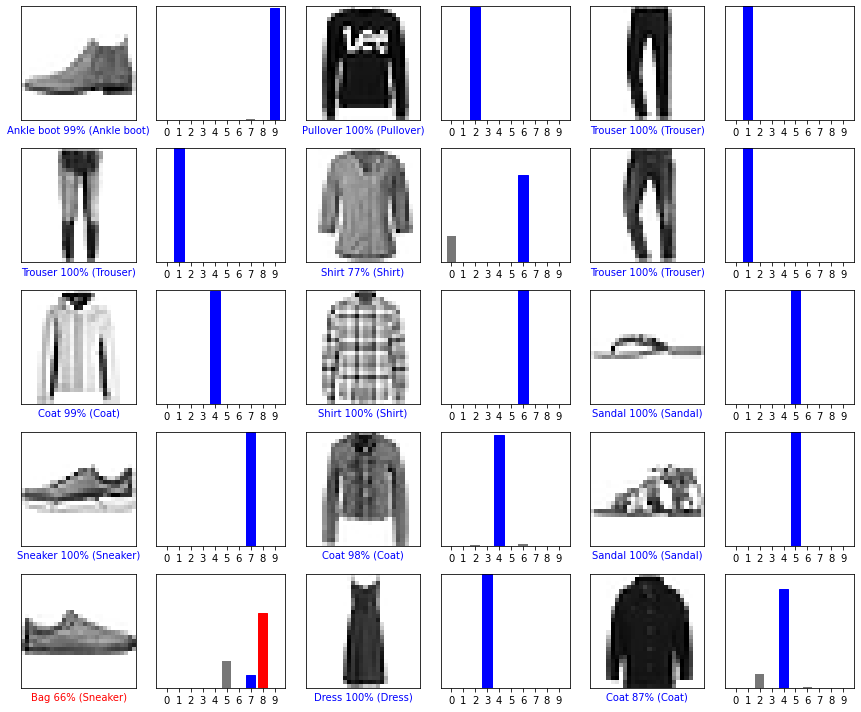

In [21]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [22]:
# Save the model. (HDF5JSON)
model_json = probability_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
probability_model.save_weights("model.hdf5")

In [23]:
# Get TFLite from a simple model. (https://www.tensorflow.org/lite/convert)
converter = tf.lite.TFLiteConverter.from_keras_model(probability_model)
tflite_model = converter.convert()

# Save the model. (TFLite)
model_path = 'fashion_mnist.tflite'
with open(model_path, 'wb') as f:
  f.write(tflite_model)

2021-08-12 00:59:19.211269: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /var/folders/1v/gx3qc3cn3rgbn3yrq2_l_xq40000gn/T/tmpw26ji21w/assets


2021-08-12 00:59:20.780527: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2021-08-12 00:59:20.781057: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2021-08-12 00:59:20.794041: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1137] Optimization results for grappler item: graph_to_optimize
  function_optimizer: function_optimizer did nothing. time = 0.006ms.
  function_optimizer: function_optimizer did nothing. time = 0.003ms.

2021-08-12 00:59:20.892462: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:351] Ignored output_format.
2021-08-12 00:59:20.892489: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:354] Ignored drop_control_dependency.
2021-08-12 00:59:20.956446: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:210] disabling MLIR crash reproducer, set env var `

# Use TFLite model.

In [24]:
# Preload model.
from tensorflow import (
    convert_to_tensor,
    lite,
)
interpreter = lite.Interpreter(model_path=str(model_path), num_threads=4)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [25]:
# From (28, 28) to (1, 28, 28)
img = np.expand_dims(np.array(test_images[0]), axis=0)

In [26]:
# TFLite prediction.
input_img = convert_to_tensor(img, np.float32)
interpreter.set_tensor(input_details[0]['index'], input_img)
interpreter.invoke()
prediction = interpreter.get_tensor(output_details[0]['index'])
prediction

array([[2.80699714e-06, 1.17226955e-04, 1.20790320e-08, 1.51913593e-08,
        2.40011627e-06, 7.56384514e-04, 4.61766554e-08, 1.03245946e-02,
        1.56009519e-05, 9.88780975e-01]], dtype=float32)

In [27]:
np.argmax(prediction[0])

9

In [28]:
test_labels[0]

9